In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pwd

'/content'

In [ ]:
from google.colab import files
upload = files.upload()

Saving FFFFFFFFFFFFF.xlsx to FFFFFFFFFFFFF (2).xlsx


In [ ]:
import io
df = pd.read_excel('FFFFFFFFFFFFF.xlsx')

In [34]:
df.head()

,churn,age,rent_or_own,trivia_played,trivia_shared_results,trivia_view_unlocked,trivia_view_results,cards_share,cards_viewed,cards_helpful,cards_not_helpful,cards_clicked,has_used_mobile,more_than_one_mobile_device,payfreq,loan_pending,withdrawn_application,paid_off_loan,did_not_accept_funding,un_linked_account,re_linked_account,cash_back_engagement,has_referred
0,1,25,R,0,0,5,0,0,5,0,0,1,1,0,3,0,0,0,0,0,0,0.07,0
1,1,27,R,57,2,46,57,0,295,0,0,57,1,0,2,0,0,0,0,0,0,1.90,0
2,1,28,O,5,2,0,3,0,190,0,0,12,1,0,2,0,0,0,0,0,0,1.97,0
3,1,22,R,0,0,0,0,0,8,0,0,0,1,2,0,0,0,0,0,0,0,0.00,0
4,1,32,R,0,0,0,0,0,115,0,0,5,1,0,0,0,0,0,0,1,0,1.17,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23312 entries, 0 to 23311
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   churn                        23312 non-null  int64  
 1   age                          23312 non-null  int64  
 2   rent_or_own                  23312 non-null  object 
 3   trivia_played                23312 non-null  int64  
 4   trivia_shared_results        23312 non-null  int64  
 5   trivia_view_unlocked         23312 non-null  int64  
 6   trivia_view_results          23312 non-null  int64  
 7   cards_share                  23312 non-null  int64  
 8   cards_viewed                 23312 non-null  int64  
 9   cards_helpful                23312 non-null  int64  
 10  cards_not_helpful            23312 non-null  int64  
 11  cards_clicked                23312 non-null  int64  
 12  has_used_mobile              23312 non-null  int64  
 13  more_than_one_mo

***First, we need to  differentiate the categorical and continous variables***

In [ ]:
## out of 23 columns here, we have differentiated the categorical variables as:


**These are the categorical columns**

1.churn

2.rent_or_own

3.has_used_mobile

4.more_than_one_mobile

5.payfreq

6.loan_pending

7.withdrawn_application

8.paid_off_loan

9.did_not_accept_funding

10.un_linked_account

11.re_linked_account

12.has_referred



In [ ]:
## The remaining columns are continuous variables

EXPLORATORY DATA ANALYSIS

In [ ]:
# 1. countplots

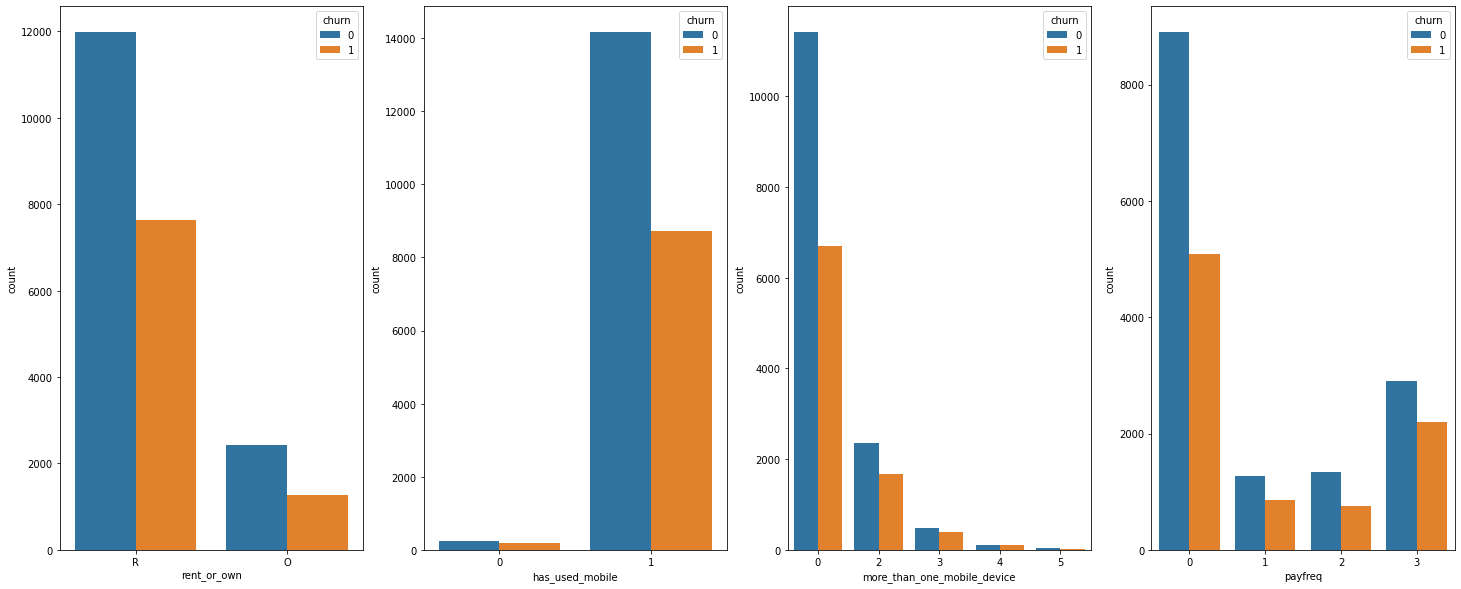

In [ ]:
fig,ax =plt.subplots(1, 4, figsize=(25, 10))
sns.countplot(x='rent_or_own',hue='churn',data=df,ax=ax[0])
sns.countplot(x='has_used_mobile',hue='churn',data=df,ax=ax[1])
sns.countplot(x='more_than_one_mobile_device',hue='churn',data=df,ax=ax[2])
sns.countplot(x='payfreq',hue='churn',data=df,ax=ax[3])
plt.show()

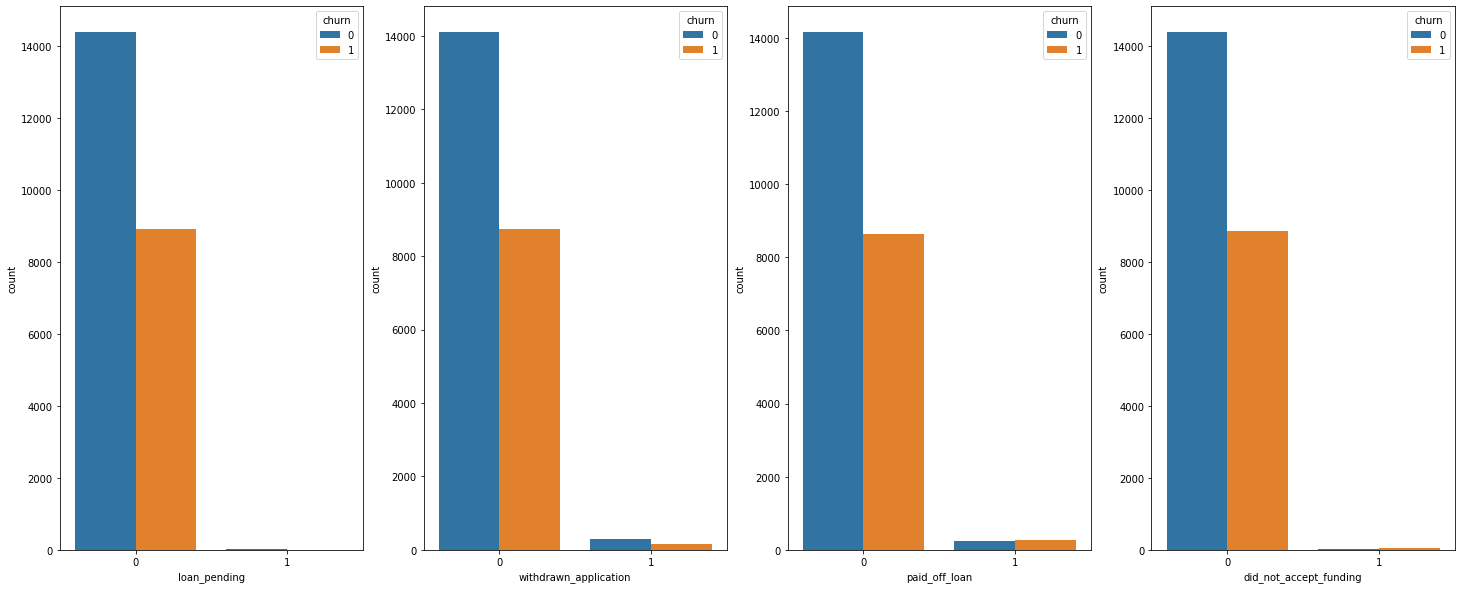

In [ ]:
fig,ax =plt.subplots(1, 4, figsize=(25, 10))
sns.countplot(x='loan_pending',hue='churn',data=df,ax=ax[0])
sns.countplot(x='withdrawn_application',hue='churn',data=df,ax=ax[1])
sns.countplot(x='paid_off_loan',hue='churn',data=df,ax=ax[2])
sns.countplot(x='did_not_accept_funding',hue='churn',data=df,ax=ax[3])
plt.show()

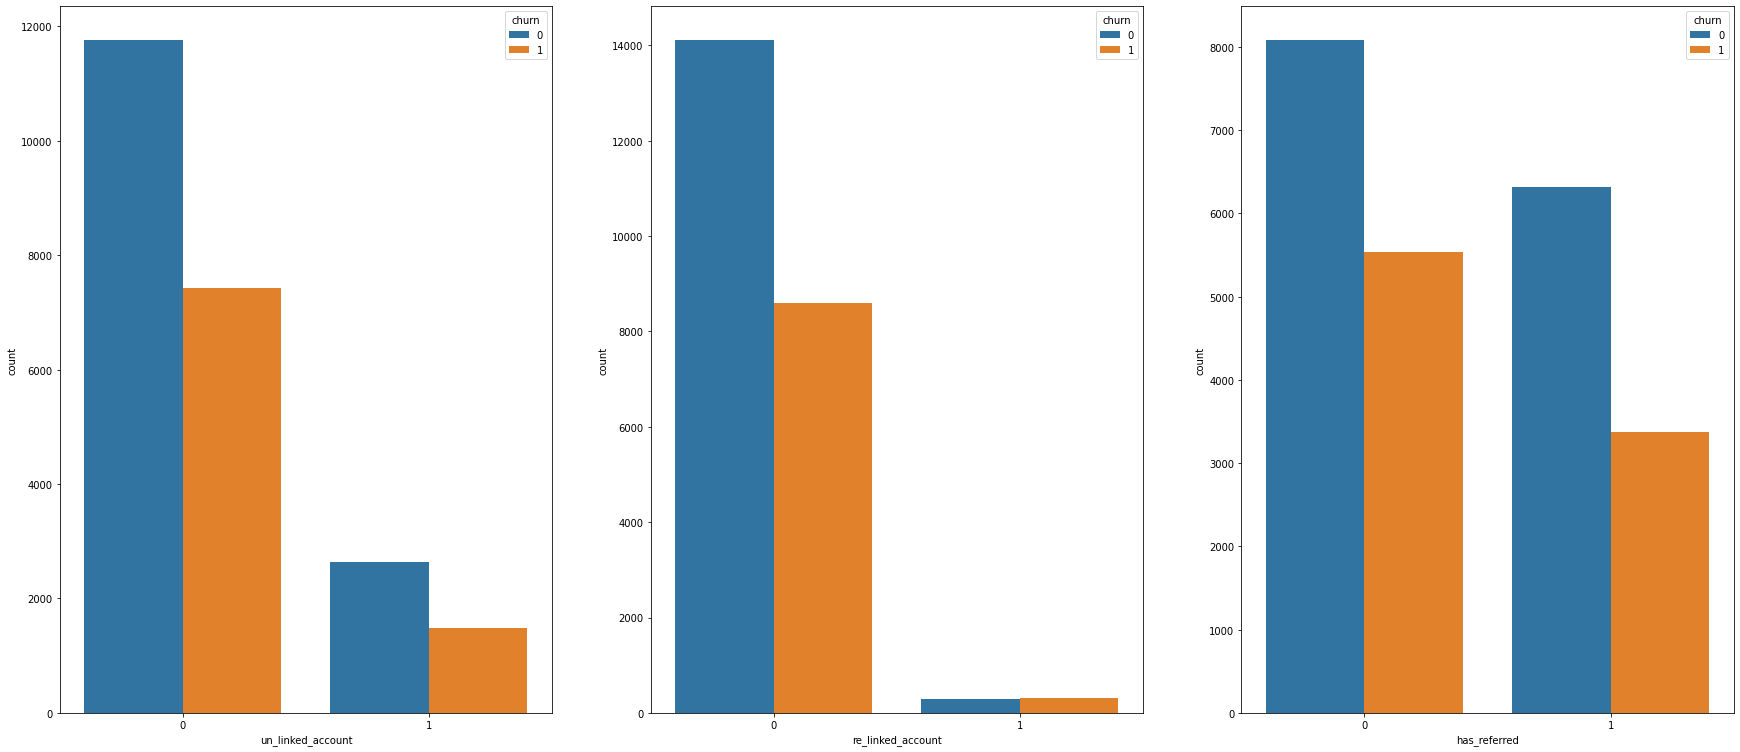

In [ ]:
fig,ax =plt.subplots(1,3,figsize=(30, 13))
sns.countplot(x='un_linked_account',hue='churn',data=df,ax=ax[0])
sns.countplot(x='re_linked_account',hue='churn',data=df,ax=ax[1])
sns.countplot(x='has_referred',hue='churn',data=df,ax=ax[2])
plt.show()

***STATISTICAL PLOTS***

In [ ]:
# Let's plot box plots to view the outliers. As there are 4 columns named after "TRIVIA", we will start with them

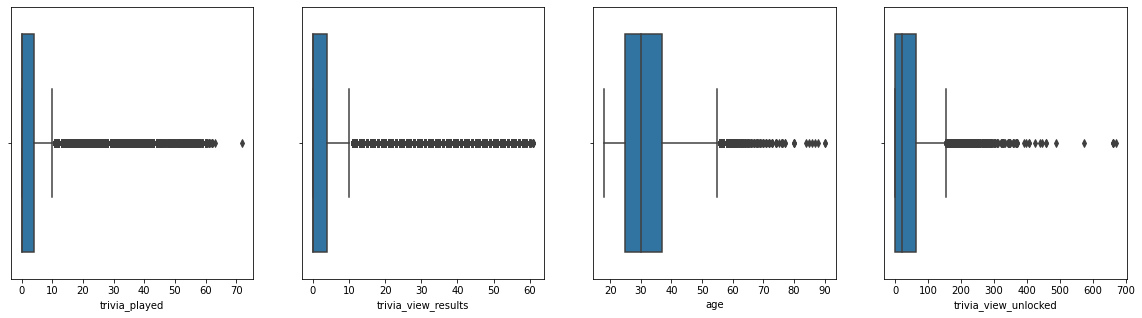

In [ ]:
fig,ax =plt.subplots(1,4,figsize=(20,5))
sns.boxplot(x=df['trivia_played'],ax=ax[0])
sns.boxplot(x=df['trivia_view_results'],ax=ax[1])
sns.boxplot(x=df['age'],ax=ax[2])
sns.boxplot(x=df['trivia_view_unlocked'],ax=ax[3])
plt.show()

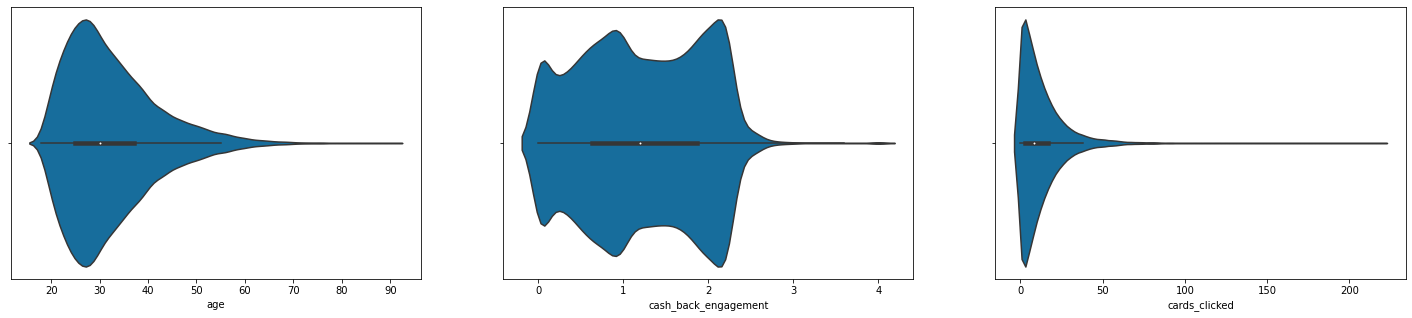

In [ ]:
fig,ax =plt.subplots(1,3,figsize=(25,5))
sns.violinplot(x=df['age'],palette='colorblind',ax=ax[0])
sns.violinplot(x=df['cash_back_engagement'],ax=ax[1],palette='colorblind')
sns.violinplot(x=df['cards_clicked'],ax=ax[2],palette='colorblind')

DIMENSIONALITY REDUCTION

In [ ]:
# LOW VARIANCE FILTER

In [ ]:
numerical_cols = df[['age','trivia_played','trivia_shared_results','trivia_view_unlocked','trivia_view_results','cards_share','cards_viewed','cards_helpful','cards_clicked','cash_back_engagement']]
categorical_cols = df.drop(numerical_cols,axis=1)

In [ ]:
numerical_cols

,age,trivia_played,trivia_shared_results,trivia_view_unlocked,trivia_view_results,cards_share,cards_viewed,cards_helpful,cards_clicked,cash_back_engagement
0,25,0,0,5,0,0,5,0,1,0.07
1,27,57,2,46,57,0,295,0,57,1.90
2,28,5,2,0,3,0,190,0,12,1.97
3,22,0,0,0,0,0,8,0,0,0.00
4,32,0,0,0,0,0,115,0,5,1.17
...,...,...,...,...,...,...,...,...,...,...
23307,42,0,0,16,0,0,142,0,4,1.53
23308,28,3,2,114,3,0,247,0,13,1.80
23309,37,0,0,124,0,0,166,0,2,1.17
23310,23,0,0,130,0,0,222,0,13,1.97


In [ ]:
categorical_cols

,churn,rent_or_own,cards_not_helpful,has_used_mobile,more_than_one_mobile_device,payfreq,loan_pending,withdrawn_application,paid_off_loan,did_not_accept_funding,un_linked_account,re_linked_account,has_referred
0,1,R,0,1,0,3,0,0,0,0,0,0,0
1,1,R,0,1,0,2,0,0,0,0,0,0,0
2,1,O,0,1,0,2,0,0,0,0,0,0,0
3,1,R,0,1,2,0,0,0,0,0,0,0,0
4,1,R,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23307,0,R,0,1,2,0,0,0,0,0,0,0,1
23308,0,R,0,1,2,0,0,0,0,0,0,0,1
23309,0,R,0,1,0,0,0,0,0,0,1,0,1
23310,0,R,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_cols['rent_or_own'] = le.fit_transform(categorical_cols['rent_or_own'])

In [ ]:
categorical_cols

,churn,rent_or_own,cards_not_helpful,has_used_mobile,more_than_one_mobile_device,payfreq,loan_pending,withdrawn_application,paid_off_loan,did_not_accept_funding,un_linked_account,re_linked_account,has_referred
0,1,1,0,1,0,3,0,0,0,0,0,0,0
1,1,1,0,1,0,2,0,0,0,0,0,0,0
2,1,0,0,1,0,2,0,0,0,0,0,0,0
3,1,1,0,1,2,0,0,0,0,0,0,0,0
4,1,1,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23307,0,1,0,1,2,0,0,0,0,0,0,0,1
23308,0,1,0,1,2,0,0,0,0,0,0,0,1
23309,0,1,0,1,0,0,0,0,0,0,1,0,1
23310,0,1,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import normalize
num_norm = normalize(numerical_cols)

In [ ]:
num_norm

array([[0.96153498, 0.        , 0.        , ..., 0.        , 0.0384614 ,
        0.0026923 ],
       [0.08554221, 0.1805891 , 0.00633646, ..., 0.        , 0.1805891 ,
        0.00601964],
       [0.1454278 , 0.02596925, 0.0103877 , ..., 0.        , 0.0623262 ,
        0.01023188],
       ...,
       [0.17577967, 0.        , 0.        , ..., 0.        , 0.0095016 ,
        0.00555844],
       [0.08893252, 0.        , 0.        , ..., 0.        , 0.05026621,
        0.00761726],
       [0.16340068, 0.        , 0.        , ..., 0.        , 0.08472628,
        0.00465995]])

In [ ]:
data_scaled = pd.DataFrame(num_norm)

In [ ]:
data_scaled

,0,1,2,3,4,5,6,7,8,9
0,0.961535,0.000000,0.000000,0.192307,0.000000,0.0,0.192307,0.0,0.038461,0.002692
1,0.085542,0.180589,0.006336,0.145739,0.180589,0.0,0.934628,0.0,0.180589,0.006020
2,0.145428,0.025969,0.010388,0.000000,0.015582,0.0,0.986832,0.0,0.062326,0.010232
3,0.939793,0.000000,0.000000,0.000000,0.000000,0.0,0.341743,0.0,0.000000,0.000000
4,0.267828,0.000000,0.000000,0.000000,0.000000,0.0,0.962508,0.0,0.041848,0.009792
...,...,...,...,...,...,...,...,...,...,...
23307,0.281871,0.000000,0.000000,0.107379,0.000000,0.0,0.952991,0.0,0.026845,0.010268
23308,0.102253,0.010956,0.007304,0.416316,0.010956,0.0,0.902017,0.0,0.047475,0.006573
23309,0.175780,0.000000,0.000000,0.589099,0.000000,0.0,0.788633,0.0,0.009502,0.005558
23310,0.088933,0.000000,0.000000,0.502662,0.000000,0.0,0.858392,0.0,0.050266,0.007617


In [ ]:
data_scaled.var()

0    0.080750
1    0.003160
2    0.000101
3    0.041227
4    0.003014
5    0.000031
6    0.068551
7    0.000075
8    0.004942
9    0.000045
dtype: float64

In [ ]:
variance = pd.DataFrame(data_scaled.var())
columns = pd.DataFrame(numerical_cols.columns)

In [ ]:
total = pd.concat([columns,variance],axis=1)

In [ ]:
total

,0,0
0,age,0.080750
1,trivia_played,0.003160
2,trivia_shared_results,0.000101
3,trivia_view_unlocked,0.041227
4,trivia_view_results,0.003014
5,cards_share,0.000031
6,cards_viewed,0.068551
7,cards_helpful,0.000075
8,cards_clicked,0.004942
9,cash_back_engagement,0.000045


In [ ]:
# As we can see that,we are having a few columns which have variance nearly equal to zero.But before deleting, let's check their correlations

CORRELATIONS

In [ ]:
numerical_cols = df[['age','churn','trivia_played','trivia_shared_results','trivia_view_unlocked','trivia_view_results','cards_share','cards_viewed','cards_helpful','cards_clicked','cash_back_engagement']]
categorical_cols = df.drop(numerical_cols,axis=1)

In [ ]:
numerical_cols

,age,churn,trivia_played,trivia_shared_results,trivia_view_unlocked,trivia_view_results,cards_share,cards_viewed,cards_helpful,cards_clicked,cash_back_engagement
0,25,1,0,0,5,0,0,5,0,1,0.07
1,27,1,57,2,46,57,0,295,0,57,1.90
2,28,1,5,2,0,3,0,190,0,12,1.97
3,22,1,0,0,0,0,0,8,0,0,0.00
4,32,1,0,0,0,0,0,115,0,5,1.17
...,...,...,...,...,...,...,...,...,...,...,...
23307,42,0,0,0,16,0,0,142,0,4,1.53
23308,28,0,3,2,114,3,0,247,0,13,1.80
23309,37,0,0,0,124,0,0,166,0,2,1.17
23310,23,0,0,0,130,0,0,222,0,13,1.97


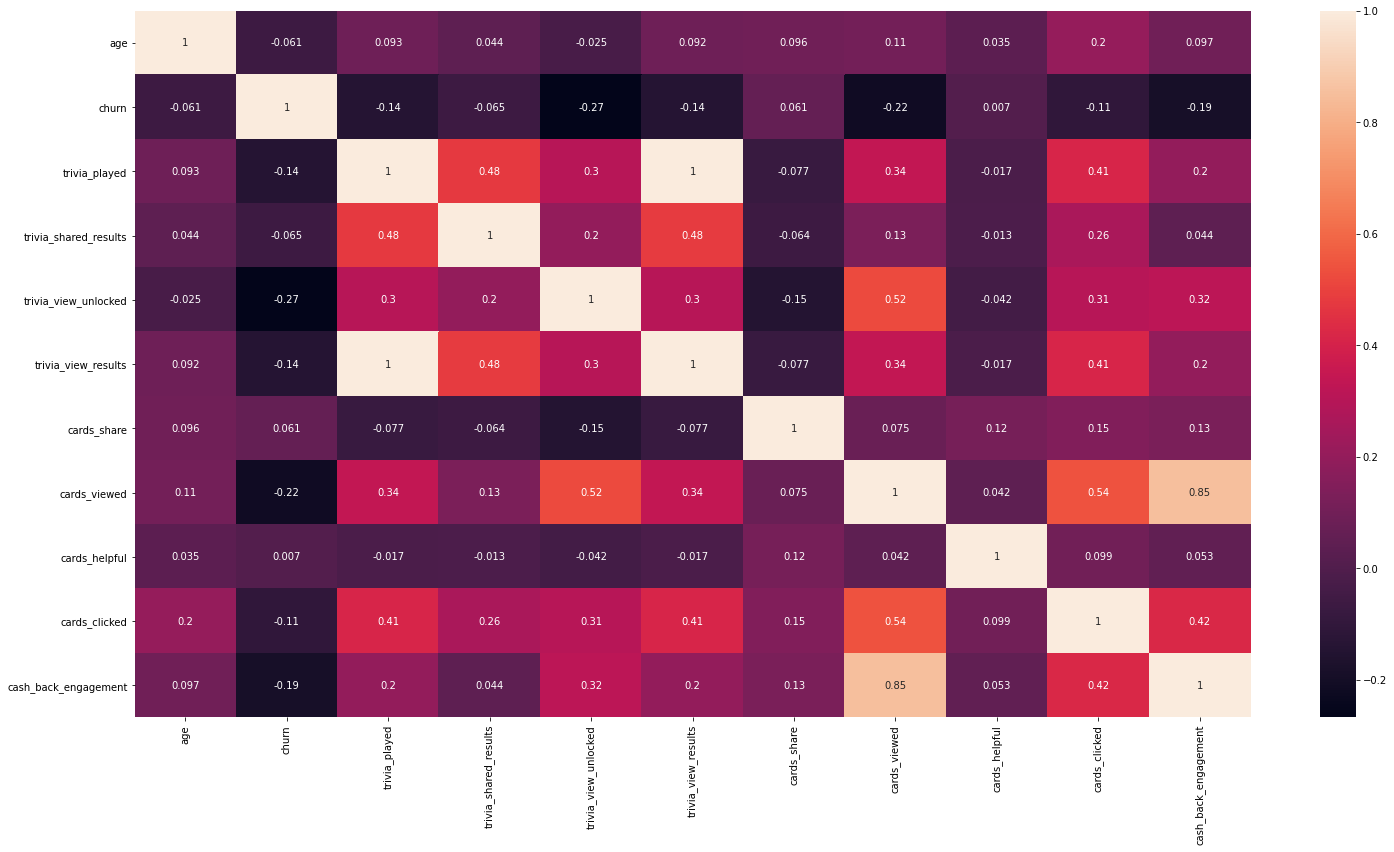

In [ ]:
plt.figure(figsize=(25,13))
sns.heatmap( numerical_cols.corr(),annot=True)
plt.show()

In [35]:
# We can see that there are two instances where the correlation is higher1. We need to delete one of them

#we can see that , trivia_played and trivia_view_results have +1 correlation
#we can see that , cards_viewed and cash_back_engagement have +0.85 correlation.

#we can see that, trivia_played || churn has a value of -0.14
#we can see that, trivia_view_results || churn has a value of -0.14
#we can see that, cards_viewed || churn has a value of -0.22
# we can see that, cash_back_engagement || churn has a value of -0.19


# we opt to delete the columns (trivia_view_results,cash_back_engagement )


In [37]:
total# we can also see that the variance of these columns are also not that high, we can safely delete them

,0,0
0,age,0.080750
1,trivia_played,0.003160
2,trivia_shared_results,0.000101
3,trivia_view_unlocked,0.041227
4,trivia_view_results,0.003014
5,cards_share,0.000031
6,cards_viewed,0.068551
7,cards_helpful,0.000075
8,cards_clicked,0.004942
9,cash_back_engagement,0.000045


In [39]:
numerical_cols = numerical_cols.drop(['cash_back_engagement','trivia_view_results','cards_helpful','cards_share'],axis=1)

In [40]:
numerical_cols

,age,churn,trivia_played,trivia_shared_results,trivia_view_unlocked,cards_viewed,cards_clicked
0,25,1,0,0,5,5,1
1,27,1,57,2,46,295,57
2,28,1,5,2,0,190,12
3,22,1,0,0,0,8,0
4,32,1,0,0,0,115,5
...,...,...,...,...,...,...,...
23307,42,0,0,0,16,142,4
23308,28,0,3,2,114,247,13
23309,37,0,0,0,124,166,2
23310,23,0,0,0,130,222,13


In [41]:
categorical_cols

,rent_or_own,cards_not_helpful,has_used_mobile,more_than_one_mobile_device,payfreq,loan_pending,withdrawn_application,paid_off_loan,did_not_accept_funding,un_linked_account,re_linked_account,has_referred
0,R,0,1,0,3,0,0,0,0,0,0,0
1,R,0,1,0,2,0,0,0,0,0,0,0
2,O,0,1,0,2,0,0,0,0,0,0,0
3,R,0,1,2,0,0,0,0,0,0,0,0
4,R,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23307,R,0,1,2,0,0,0,0,0,0,0,1
23308,R,0,1,2,0,0,0,0,0,0,0,1
23309,R,0,1,0,0,0,0,0,0,1,0,1
23310,R,0,1,0,0,0,0,0,0,0,0,1


In [45]:
df1 = pd.concat([categorical_cols,numerical_cols],axis=1)

In [46]:
df1

,rent_or_own,cards_not_helpful,has_used_mobile,more_than_one_mobile_device,payfreq,loan_pending,withdrawn_application,paid_off_loan,did_not_accept_funding,un_linked_account,re_linked_account,has_referred,age,churn,trivia_played,trivia_shared_results,trivia_view_unlocked,cards_viewed,cards_clicked
0,R,0,1,0,3,0,0,0,0,0,0,0,25,1,0,0,5,5,1
1,R,0,1,0,2,0,0,0,0,0,0,0,27,1,57,2,46,295,57
2,O,0,1,0,2,0,0,0,0,0,0,0,28,1,5,2,0,190,12
3,R,0,1,2,0,0,0,0,0,0,0,0,22,1,0,0,0,8,0
4,R,0,1,0,0,0,0,0,0,1,0,0,32,1,0,0,0,115,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23307,R,0,1,2,0,0,0,0,0,0,0,1,42,0,0,0,16,142,4
23308,R,0,1,2,0,0,0,0,0,0,0,1,28,0,3,2,114,247,13
23309,R,0,1,0,0,0,0,0,0,1,0,1,37,0,0,0,124,166,2
23310,R,0,1,0,0,0,0,0,0,0,0,1,23,0,0,0,130,222,13


In [47]:
df1['rent_or_own']= le.fit_transform(df1['rent_or_own'])

TRAIN, TEST AND SPLIT...

In [49]:
X = df1.drop(['churn'],axis=1)
Y = df1['churn']

In [53]:
print(X.shape)
print(Y.shape)

(23312, 18)
(23312,)


FORWARD FEATURE SELECTION

In [54]:
!pip install mlxtend

In [55]:
# importing the models
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [57]:
# calling the linear regression model
lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=15, forward=True, verbose=2, scoring='neg_mean_squared_error')

In [59]:
sfs1 = sfs1.fit(X, Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.3s finished

[2020-06-19 07:37:41] Features: 1/15 -- score: -0.29727371347633147[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s finished

[2020-06-19 07:37:42] Features: 2/15 -- score: -0.29563267095342294[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s finished

[2020-06-19 07:37:42] Features: 3/15 -- score: -0.2944617335725865[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: D

In [60]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['rent_or_own', 'cards_not_helpful', 'more_than_one_mobile_device', 'payfreq', 'loan_pending', 'withdrawn_application', 'paid_off_loan', 'did_not_accept_funding', 'un_linked_account', 're_linked_account', 'has_referred', 'age', 'trivia_played', 'trivia_shared_results', 'trivia_view_unlocked']


In [63]:
new_data = pd.DataFrame(feat_names)

In [64]:
new_data

,0
0,rent_or_own
1,cards_not_helpful
2,more_than_one_mobile_device
3,payfreq
4,loan_pending
5,withdrawn_application
6,paid_off_loan
7,did_not_accept_funding
8,un_linked_account
9,re_linked_account


In [71]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [72]:
K = X

In [73]:
K

,rent_or_own,cards_not_helpful,has_used_mobile,more_than_one_mobile_device,payfreq,loan_pending,withdrawn_application,paid_off_loan,did_not_accept_funding,un_linked_account,re_linked_account,has_referred,age,trivia_played,trivia_shared_results,trivia_view_unlocked,cards_viewed,cards_clicked
0,1,0,1,0,3,0,0,0,0,0,0,0,25,0,0,5,5,1
1,1,0,1,0,2,0,0,0,0,0,0,0,27,57,2,46,295,57
2,0,0,1,0,2,0,0,0,0,0,0,0,28,5,2,0,190,12
3,1,0,1,2,0,0,0,0,0,0,0,0,22,0,0,0,8,0
4,1,0,1,0,0,0,0,0,0,1,0,0,32,0,0,0,115,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23307,1,0,1,2,0,0,0,0,0,0,0,1,42,0,0,16,142,4
23308,1,0,1,2,0,0,0,0,0,0,0,1,28,3,2,114,247,13
23309,1,0,1,0,0,0,0,0,0,1,0,1,37,0,0,124,166,2
23310,1,0,1,0,0,0,0,0,0,0,0,1,23,0,0,130,222,13


In [74]:
K = sc.fit_transform(K)

In [76]:
K.shape

(23312, 18)

In [124]:
from sklearn.model_selection import  train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(K, Y, test_size=0.2,random_state=25) 

MODEL TRAINING AND PREDICTIONS : 

In [56]:
# Support functions
from sklearn.model_selection import cross_val_score

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [78]:
#1. Logistic Regression
lr = LogisticRegression()

In [79]:
lr.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
Y_pred_lr = lr.predict(X_test)

In [82]:
print(classification_report(Y_test, Y_pred_lr))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77      2942
           1       0.60      0.42      0.49      1721

    accuracy                           0.68      4663
   macro avg       0.66      0.63      0.63      4663
weighted avg       0.67      0.68      0.67      4663



In [85]:
## 68% is a bit bad, let's try SVC

In [90]:
#2. Support vector classification

In [86]:
svc = SVC()

In [88]:
svc.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [89]:
Y_pred_svc = svc.predict(X_test)

In [91]:
print(classification_report(Y_test, Y_pred_svc))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77      2942
           1       0.61      0.47      0.53      1721

    accuracy                           0.69      4663
   macro avg       0.67      0.65      0.65      4663
weighted avg       0.68      0.69      0.68      4663



In [97]:
#3. Randomforestclassifier

In [125]:
rf = RandomForestClassifier()

In [126]:
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [127]:
Y_pred_rf = rf.predict(X_test)

In [128]:
print(classification_report(Y_test, Y_pred_rf))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80      2900
           1       0.69      0.53      0.60      1763

    accuracy                           0.73      4663
   macro avg       0.72      0.69      0.70      4663
weighted avg       0.73      0.73      0.72      4663



In [129]:
from sklearn.model_selection import RandomizedSearchCV
xgb_nst = XGBClassifier()

In [130]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [131]:
random_search=RandomizedSearchCV(xgb_nst,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [132]:
a = random_search.fit(X_train,Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   34.6s finished


In [133]:
a.best_score_

0.7475131085423536